# Building a Simple NLP Spam Dectector

## 1.0 Loading our Data

In [37]:
import numpy as np
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/spam.csv"
data = pd.read_csv(file_name, encoding = "latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Let's rename our columns to something a bit more interpretable and extract only the columns we need

In [38]:
data = data[['v1', 'v2']]
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
data.shape

(5572, 2)

In [40]:
data.label.unique()

array(['ham', 'spam'], dtype=object)

In [41]:
# percentage of missing values in each column
round(100 * (data.isnull().sum()/len(data)),2).sort_values(ascending=False)

label    0.0
text     0.0
dtype: float64

In [42]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
data[data[['label', 'text']].duplicated() == True]

,label,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [44]:
data = data.drop_duplicates()

In [45]:
# Sanity Check to make sure it worked
data[data[['label', 'text']].duplicated() == True]

,label,text


In [46]:
data.shape

(5169, 2)

#### Simple plot of out class label counts

<AxesSubplot:>

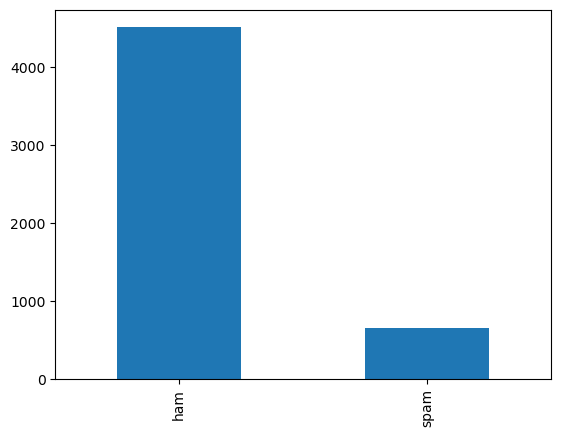

In [47]:
data.label.value_counts().plot(kind="bar")

# 2. Building our Spam/Ham Classifer

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def review_messages(msg):
    # converting messages to lowercase
    msg = msg.lower()
    return msg

In [49]:
# Processing text messages
data['text'] = data['text'].apply(review_messages)

In [50]:
# Inspect the changes on our data
data

,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


### Preparing our data

In [51]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.1, random_state = 1)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
# training vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

![](https://miro.medium.com/max/3604/0*56JnM18OAx1lhIQb.png)

### Training our model

In [53]:
from sklearn import svm
# training the classifier 
svm = svm.SVC(C=1000)
svm.fit(X_train_vec, y_train)

SVC(C=1000)

In [54]:
# testing against testing set 
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test) 

print("We have an accuracy of: " + str(accuracy_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))
#y_test and y_pred store which are spam or ham
#vectorized data matrix store in which email, which word's tfidf

We have an accuracy of: 0.9845261121856866
[[462   0]
 [  8  47]]


### Predict where your text is Spam or Ham

In [55]:
# test against new messages 
def pred(msg):
    msg = vectorizer.transform([msg])
    prediction = svm.predict(msg)
    return prediction[0]

In [56]:
for i in range(0, 10):
  rand_index = np.random.randint(0, len(data))
  test_sample = data.iloc[rand_index][1]

  print(test_sample)
  print("Text is - " + str(pred(test_sample)) +"\n")

unfortunately i've just found out that we have to pick my sister up from the airport that evening so don't think i'll be going out at all. we should try to go out one of th
Text is - ham

mm yes dear look how i am hugging you both. :-p
Text is - ham

\getting tickets 4 walsall tue 6 th march. my mate is getting me them on sat. ill pay my treat. want 2 go. txt bak .terry\""
Text is - ham

i'm done. c ì_ there.
Text is - ham

hi baby im cruisin with my girl friend what r u up 2? give me a call in and hour at home if thats alright or fone me on this fone now love jenny xxx
Text is - ham

not a drop in the tank
Text is - ham

do have a nice day today. i love you so dearly.
Text is - ham

fffff. can you text kadeem or are you too far gone
Text is - ham

excellent. i spent  &lt;#&gt;  years in the air force. iraq and afghanistan. i am stable and honest. do you like traveling?
Text is - ham

leaving to qatar tonite in search of an opportunity.all went fast.pls add me in ur prayers dear.rakhes

C:\Users\22600\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Top spam features: ['txt', 'uk', 'service', 'www', 'claim', '50', '150p', 'mobile', 'ringtone', 'reply', '88066', 'com', 'dating', 'ac', 'stop', 'http', 'prize', '07090201529', '18', '146tf150p']
Top ham features: ['liked', 'll', 'fullonsms', 'did', 'said', 'mail', 'way', 'later', 'ok', 'gt', 'yup', 'lt', 'home', 'da', 'morning', 'hey', 'doesnt', 'knowing', 'bak', 'bus']


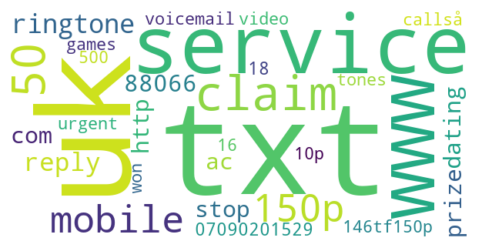

time cost 0.5471034049987793


In [64]:
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


import time

time_start = time.time()

# Load the data
df = data

# Split the data into training and testing sets
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

# Preprocess the data
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = vectorizer.fit_transform(train['text'])
X_test = vectorizer.transform(test['text'])
y_train = train['label']
y_test = test['label']

# Train an SVM classifier
svm = LinearSVC()
svm.fit(X_train, y_train)

# Get the feature importance
feature_importance = svm.coef_[0]

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names()

# Sort the feature importance in descending order and get the top 20 features
top_spam_features = [feature_names[i] for i in feature_importance.argsort()[::-1][:20]]
top_ham_features = [feature_names[i] for i in feature_importance.argsort()[:20]]

top_coeffs = pd.DataFrame({'spam': top_spam_features, 'ham': top_ham_features})


# Print the top spam and ham features
print('Top spam features:', top_spam_features)
print('Top ham features:', top_ham_features)

# Generate the word cloud
wc = WordCloud(width=600, height=300, background_color='white', max_words=30, stopwords=vectorizer.get_stop_words()).generate_from_frequencies(
    {word: freq/feature_importance.max() for word, freq in zip(vectorizer.get_feature_names(), feature_importance)}
)
plt.figure(figsize=(6, 3))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

time_end = time.time()
print('time cost',time_end-time_start)


In [58]:
top_coeffs = pd.DataFrame({'spam': top_spam_features, 'ham': top_ham_features})
print(top_coeffs)

           spam        ham
0           txt      liked
1            uk         ll
2       service  fullonsms
3           www        did
4         claim       said
5            50       mail
6          150p        way
7        mobile      later
8      ringtone         ok
9         reply         gt
10        88066        yup
11          com         lt
12       dating       home
13           ac         da
14         stop    morning
15         http        hey
16        prize     doesnt
17  07090201529    knowing
18           18        bak
19    146tf150p        bus


In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import precision_score

# Define SVM model with best hyperparameters
svm_model = LinearSVC()

X = vectorizer.fit_transform(data['text'])
y = data['label']

# Perform 10-fold cross-validation
scores = cross_val_score(svm_model, X, y, cv=10, scoring='f1_macro')

# Print cross-validation scores
print('Cross-validation scores:', scores)

# Print mean and standard deviation of cross-validation scores
print('Mean F1 score:', np.mean(scores))
print('Standard deviation of F1 score:', np.std(scores))

scoring_recall = make_scorer(recall_score, pos_label='spam')
scores_recall = cross_val_score(svm_model, X, y, cv=10, scoring=scoring_recall)
print('scores_recall:', scores_recall)
print('Mean recall score:', np.mean(scores_recall))
print('Standard deviation of recall score:', np.std(scores_recall))

scoring_precision = make_scorer(precision_score, pos_label='spam')
scores_precision = cross_val_score(svm_model, X, y, cv=10, scoring=scoring_precision)
print('scores_precision:', scores_precision)
print('Mean precision score:', np.mean(scores_precision))
print('Standard deviation of precision score:', np.std(scores_precision))

Cross-validation scores: [0.97755862 0.94424072 0.94777058 0.94852136 0.94343545 0.94260232
 0.93303604 0.95353394 0.9590495  0.92876011]
Mean F1 score: 0.947850866020844
Standard deviation of F1 score: 0.012979697729440095
scores_recall: [0.93846154 0.84615385 0.83076923 0.84615385 0.83076923 0.81538462
 0.78787879 0.84848485 0.87878788 0.8       ]
Mean recall score: 0.8422843822843824
Standard deviation of recall score: 0.04048169275805618
scores_precision: [0.98387097 0.96491228 1.         0.98214286 0.98181818 1.
 1.         1.         0.98305085 0.96296296]
Mean precision score: 0.9858758097825321
Standard deviation of precision score: 0.013434426604609995


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import precision_score

# Define SVM model with best hyperparameters
svm_model = LinearSVC()

X = vectorizer.fit_transform(data['text'])
y = data['label']

# Perform 10-fold cross-validation
scores = cross_val_score(svm_model, X, y, cv=10, scoring='f1_macro')

# Print cross-validation scores
# Print mean and standard deviation of cross-validation scores
print('Mean F1 score:', np.mean(scores))
print('Standard deviation of F1 score:', np.std(scores))

scoring_recall = make_scorer(recall_score, pos_label='spam')
scores_recall = cross_val_score(svm_model, X, y, cv=10, scoring=scoring_recall)
print('Mean recall score:', np.mean(scores_recall))
print('Standard deviation of recall score:', np.std(scores_recall))

scoring_precision = make_scorer(precision_score, pos_label='spam')
scores_precision = cross_val_score(svm_model, X, y, cv=10, scoring=scoring_precision)
print('Mean precision score:', np.mean(scores_precision))
print('Standard deviation of precision score:', np.std(scores_precision))

Mean F1 score: 0.947850866020844
Standard deviation of F1 score: 0.012979697729440095
Mean recall score: 0.8422843822843824
Standard deviation of recall score: 0.04048169275805618
Mean precision score: 0.9858758097825321
Standard deviation of precision score: 0.013434426604609995
